In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
pd.set_option('display.max_columns', None)

Exploring the data

In [2]:
data = pd.read_csv(r"C:\Users\Vanuhi\Downloads\archive\amz_uk_price_prediction_dataset.csv")
df = data.copy()

In [3]:
df.columns

Index(['uid', 'asin', 'title', 'stars', 'reviews', 'price', 'isBestSeller',
       'boughtInLastMonth', 'category'],
      dtype='object')

In [4]:
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [5]:
num = df.select_dtypes(include="number")
cat = df.select_dtypes(exclude="number")

In [6]:
num.columns

Index(['uid', 'stars', 'reviews', 'price', 'boughtInLastMonth'], dtype='object')

In [7]:
cat.columns

Index(['asin', 'title', 'isBestSeller', 'category'], dtype='object')

In [8]:
df = df.rename(columns = {'boughtInLastMonth': 'bought_in_last_month', 'isBestSeller': 'is_bestseller'})
df.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,2443651.0,1.370545e+06,816056.169852,1.0,658921.50,1349029.00,2060685.50,2828593.0
stars,2443651.0,2.152836e+00,2.194865,0.0,0.00,0.00,4.40,5.0
reviews,2443651.0,4.806278e+02,5944.124151,0.0,0.00,0.00,59.00,1356658.0
price,2443651.0,8.924381e+01,345.608862,0.0,9.99,19.09,45.99,100000.0
bought_in_last_month,2443651.0,2.589699e+01,240.483727,0.0,0.00,0.00,0.00,50000.0


### 1.1 Building frequency table for the product category

In [9]:
freq_table = df.groupby('category')['bought_in_last_month'].sum().reset_index()
freq_table = freq_table.sort_values(by='bought_in_last_month', ascending=False)

print(freq_table)

                        category  bought_in_last_month
126       Health & Personal Care               9626950
109                      Grocery               8442550
20                        Beauty               7052400
221                 Pet Supplies               3231650
9                           Baby               2635150
..                           ...                   ...
267            Streaming Clients                     0
34                  Boxing Shoes                     0
274                      Tablets                     0
3                 Action Cameras                     0
295  eBook Readers & Accessories                     0

[296 rows x 2 columns]


Adding total row(abs)

In [10]:
total_sum = freq_table['bought_in_last_month'].sum()

In [11]:
freq_table.loc[len(freq_table)] = ['Total', total_sum]
print("\nFrequency table total row:")
print(freq_table)


Frequency table total row:
                        category  bought_in_last_month
126       Health & Personal Care               9626950
109                      Grocery               8442550
20                        Beauty               7052400
221                 Pet Supplies               3231650
9                           Baby               2635150
..                           ...                   ...
34                  Boxing Shoes                     0
274                      Tablets                     0
3                 Action Cameras                     0
295  eBook Readers & Accessories                     0
296                        Total              63283200

[297 rows x 2 columns]


Adding relative frequency values

In [12]:
freq_table['relative'] = (freq_table['bought_in_last_month'] / total_sum) * 100

print(freq_table)

                        category  bought_in_last_month    relative
126       Health & Personal Care               9626950   15.212489
109                      Grocery               8442550   13.340902
20                        Beauty               7052400   11.144190
221                 Pet Supplies               3231650    5.106648
9                           Baby               2635150    4.164059
..                           ...                   ...         ...
34                  Boxing Shoes                     0    0.000000
274                      Tablets                     0    0.000000
3                 Action Cameras                     0    0.000000
295  eBook Readers & Accessories                     0    0.000000
296                        Total              63283200  100.000000

[297 rows x 3 columns]


The top 5 most listed product categories

In [13]:
freq_table.head()

,category,bought_in_last_month,relative
126,Health & Personal Care,9626950,15.212489
109,Grocery,8442550,13.340902
20,Beauty,7052400,11.144190
221,Pet Supplies,3231650,5.106648
9,Baby,2635150,4.164059


### 1.2 Visualization

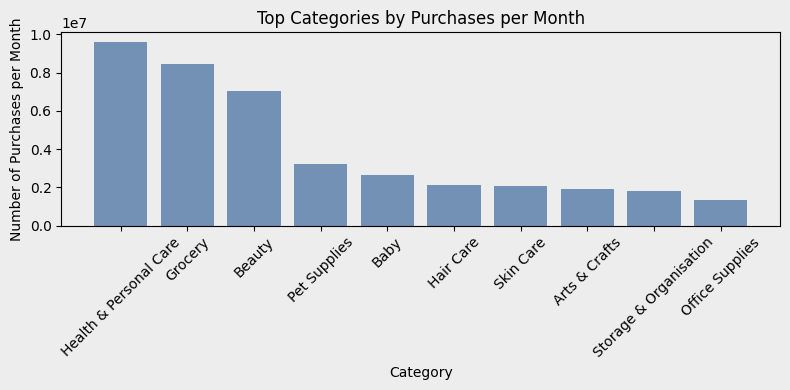

In [14]:
# Sort the table in descending order and select the top 10 categories
top_categories = freq_table[freq_table['category'] != 'Total'].sort_values(by='bought_in_last_month', ascending=False).head(10)


pantone_allure = "#7391B5"  
bg_color = "#ededed"     

plt.figure(figsize=(8, 4), facecolor=bg_color)

ax = plt.gca()         
ax.set_facecolor(bg_color) 

plt.bar(top_categories['category'], top_categories['bought_in_last_month'], color=pantone_allure)
plt.xlabel('Category')
plt.ylabel('Number of Purchases per Month')
plt.title('Top Categories by Purchases per Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


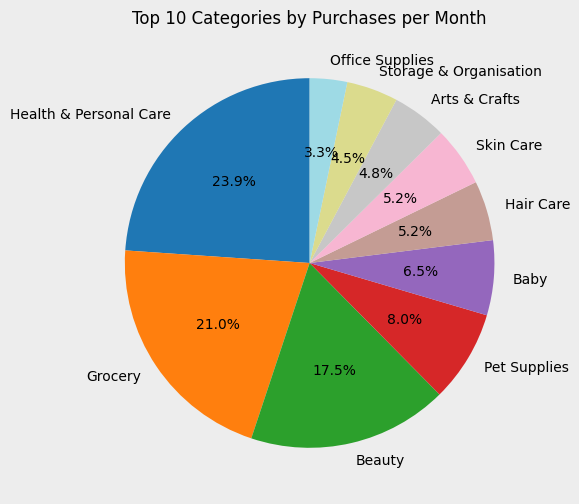

In [15]:
# Create a colormap with as many colors as there are categories
# Here we use the 'tab10' colormap, which has 10 distinct colors
cmap = plt.get_cmap('tab20')
colors = cmap(np.linspace(0, 1, len(top_categories)))


pantone_allure = "#7391B5"  
bg_color = "#ededed"     
 
# Create the pie chart with custom colors
plt.figure(figsize=(6, 6), facecolor=bg_color)
plt.pie(top_categories['bought_in_last_month'], 
        labels=top_categories['category'], 
        autopct='%1.1f%%', 
        startangle=90,
        colors=colors)
plt.title('Top 10 Categories by Purchases per Month')
plt.show()

#looks terrible

## 2. Product pricing

### 2.1 Mean, median and mode

In [16]:
round(df['price'].mean(), 2)

np.float64(89.24)

In [17]:
df['price'].median()

19.09

In [18]:
df['price'].mode()

0    9.99
Name: price, dtype: float64

Such a big difference between the mean and the mode indicates that prices must have a tail on the right(are positively skewed), probably high cost few products affecting values of the mean

### 2.2 Dispersion for price

In [19]:
print("Variance:",round(df['price'].var(),2))

Variance: 119445.49


In [20]:
print("Standard deviation:", round(df['price'].std(),2))

Standard deviation: 345.61


In [21]:
df['price'].max() - df['price'].min()
print("Range:", df['price'].max() - df['price'].min())

Range: 100000.0


In [22]:
df['price'].describe()

count    2.443651e+06
mean     8.924381e+01
std      3.456089e+02
min      0.000000e+00
25%      9.990000e+00
50%      1.909000e+01
75%      4.599000e+01
max      1.000000e+05
Name: price, dtype: float64

In [23]:
inter_ = df['price'].quantile(0.75) - df['price'].quantile(0.25)
print("Interquartile range:", inter_)


Interquartile range: 36.0


High value of standard deviation(345.61) indicates a big spread of prices, whereas such combination of range and IQR suggests that this spread is on the right(leading to same conclusions as in 2.1)

### 2.3 Visualizations for price

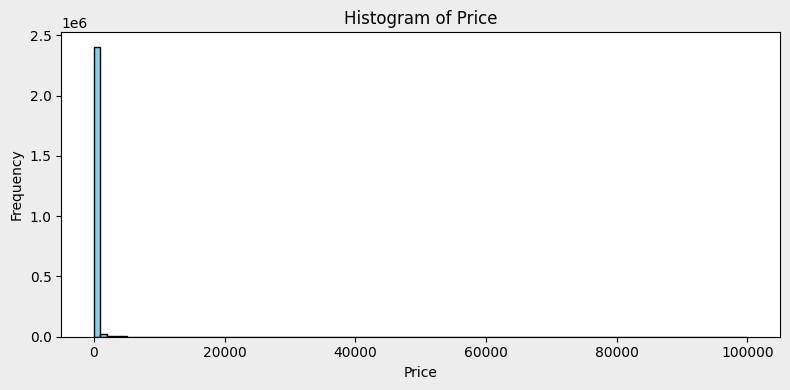

In [24]:
# Create the histogram     
plt.figure(figsize=(8,4), facecolor=bg_color)
plt.hist(df['price'], bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price')
plt.tight_layout()
plt.show()


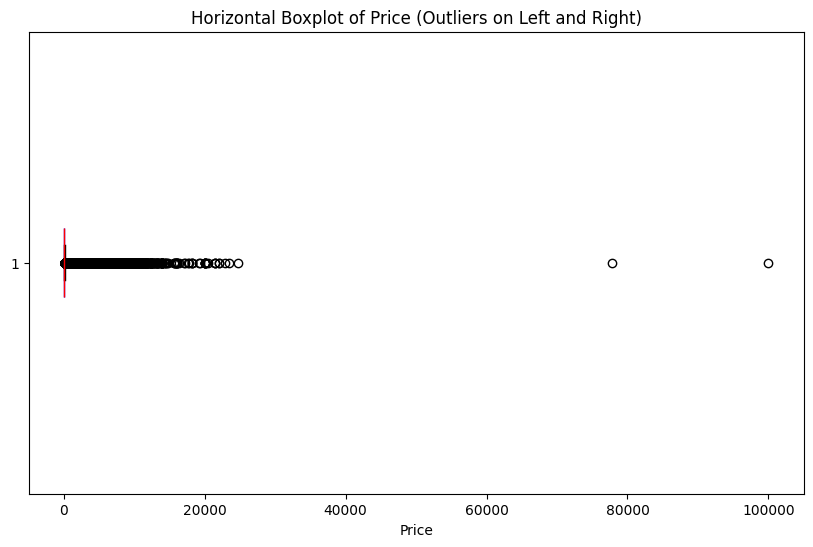

In [25]:
# Create a horizontal boxplot for the 'price' column
plt.figure(figsize=(10, 6))
plt.boxplot(df['price'], 
            patch_artist=True, 
            vert=False,  # Set to False for a horizontal boxplot
            boxprops=dict(facecolor='skyblue', color='blue'),
            medianprops=dict(color='red'))
plt.xlabel('Price')
plt.title('Horizontal Boxplot of Price (Outliers on Left and Right)')
plt.show()


Q1: 9.99, Q3: 45.99, IQR: 36.0
Lower bound: -44.01, Upper bound: 99.99000000000001


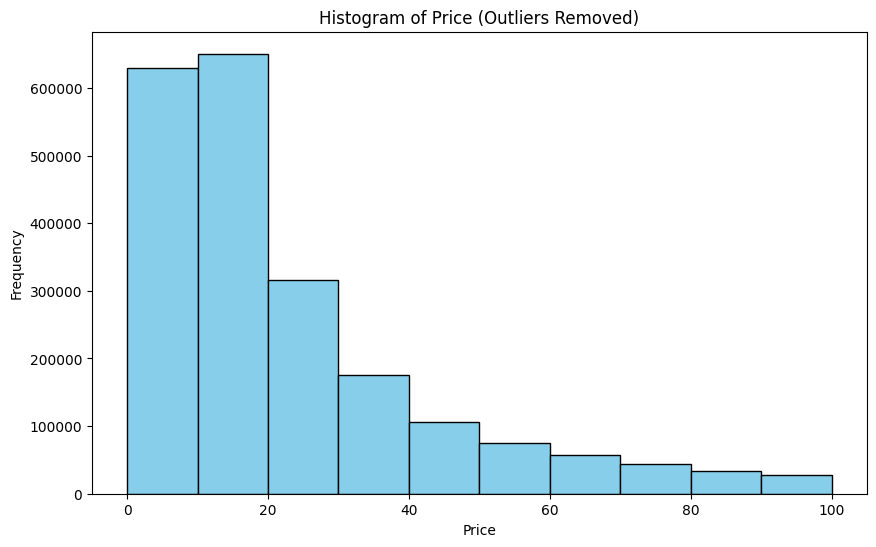

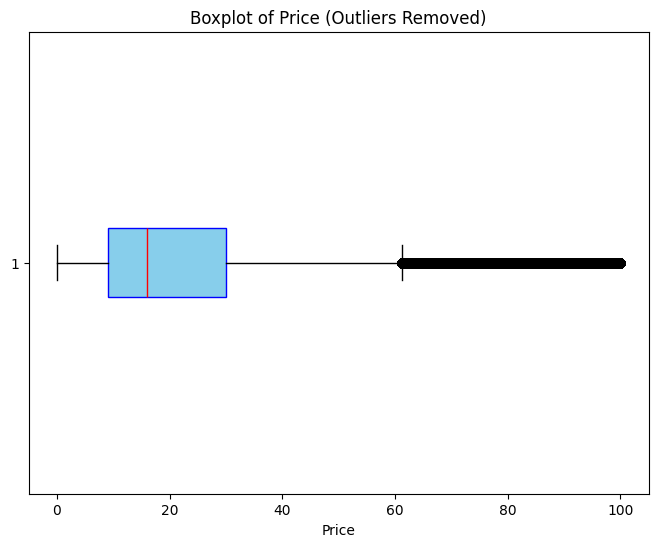

In [26]:
# Calculate the first and third quartiles
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for non-outlier data
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
print(f"Lower bound: {lower_bound}, Upper bound: {upper_bound}")

# Filter the DataFrame to remove outliers
filtered_df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

# Optional: Visualize the filtered data using a histogram
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['price'], bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Price (Outliers Removed)')
plt.show()

# Optional: Visualize the filtering result with a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_df['price'], patch_artist=True, vert=False,
            boxprops=dict(facecolor='skyblue', color='blue'),
            medianprops=dict(color='red'))
plt.xlabel('Price')
plt.title('Boxplot of Price (Outliers Removed)')
plt.show()

## 3 Product ratings

### 3.1 Centrality of ratings

In [32]:
print("Mean:",round(df['stars'].mean(), 2))

Mean: 2.15


In [33]:
print("Median:", df['stars'].median())

Median: 0.0


In [ ]:
print("Mode:",df['stars'].mode())

0    0.0
Name: stars, dtype: float64

Majority of customers doesn't rate the products.
Based on centrality measures can assume that ratings are positively skewed

### 3.2 Dispersion of ratings

In [ ]:
print("Variance:",round(df['stars'].var(), 2))

Variance: 4.82


In [37]:
print("Standard Deviation:", round(df['stars'].std(), 2))

Standard Deviation: 2.19


In [38]:
print("Range:", df['stars'].max() - df['stars'].min())

Range: 5.0


In [39]:
inter_s = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)
print("Interquartile range:", inter_s)


Interquartile range: 4.4


Conclusions based on measures of dispersion:
- based on standard deviation size - spread is quite big
- based on interquartile range - again indicates wide spread, also showing very wide central protion

### 3.3 Shape of the distribution for ratigs

In [44]:
print('Kurtosis of ratings', round(df['stars'].kurt(), 2))

Kurtosis of ratings -1.93


In [46]:
print('Skewness of ratings', round(df['stars'].skew(), 2))

Skewness of ratings 0.08


- negative kurtosis indicates lighter tails than a normal distribution and fewer extreme outliers
- positive but close to 0 skewness indicates overall symmetry

### 3.4 Visualization for ratings

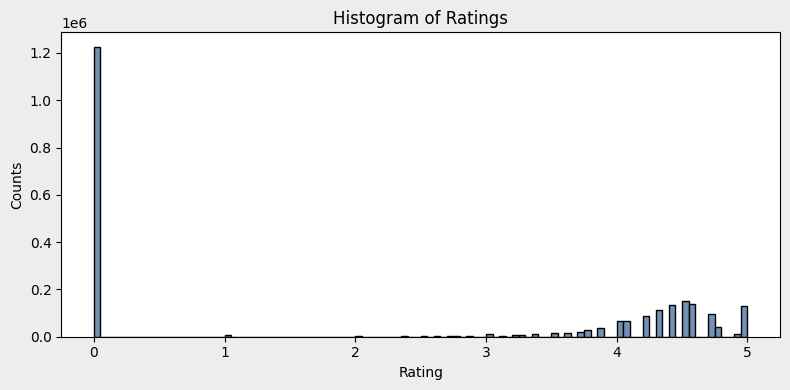

In [48]:
# Create the histogram     
plt.figure(figsize=(8,4), facecolor=bg_color)
plt.hist(df['stars'], bins=100, color=pantone_allure, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Counts')
plt.title('Histogram of Ratings')
plt.tight_layout()
plt.show()
